In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [9]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 59.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 70.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.9 MB/s eta 0:00:0

In [10]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.1 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0
    Uninstalling pip-23.0:
      Successfully uninstalled pip-23.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

2023-03-02 22:25:40.635023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 22:25:43.594075: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-02 22:25:43.594136: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-02 22:25:49.749769: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [3]:
tf.test.is_built_with_cuda()

True

In [3]:
import keras

In [4]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model

In [5]:
import joblib

In [3]:
pd.read_csv('/workspaces/Nuevo-repo/data/raw/MiningProcess3.csv')

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,4/1/2017 0:00,"59,72","9,22","2195,31","523,283","395,785","945,255","171,765","1,763,797,421,322","1,846,194,580,978",...,"249,082","807,178","799,417","799,614","461,455","476,486","421,792","449,983","64,03","3,11"
1,4/1/2017 0:00,"59,72","9,22","2148,28","520,983","397,219","945,499","171,748","1,763,793,195,901","1,846,220,493,979",...,"250,292","810,002","791,179","800,324","471,731","472,107","460,954","453,981","64,03","3,11"
2,4/1/2017 0:00,"59,72","9,22","2101,25","523,682","398,73","945,742","171,731","1,763,788,970,481","184,624,640,698",...,"248,511","800,781","802,031","802,312","474,609","469,266","493,972","447,476","64,03","3,11"
3,4/1/2017 0:00,"59,72","9,22","2054,22","524,413","400,369","945,985","171,713","176,378,474,506","184,627,231,998",...,"248,16","796,182","798,411","796,923","457,443","462,444","481,218","452,986","64,03","3,11"
4,4/1/2017 0:00,"59,72","9,22","2043,43","525,272","402,293","946,229","171,696","1,763,780,519,639","1,846,298,232,981",...,"247,747","790,783","794,159","790,596","437,286","454,435","466,243","459,457","64,03","3,11"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393114,6/30/2017 23:00,"49,36","25,87","5860,96","570,888","399,673","107,059","169,826","299,182","293,502",...,"301,342","496,924","478,888","494,201","471,674","470,42","483,382","453,305","65,83","1,27"
393115,6/30/2017 23:00,"49,36","25,87","5540,02","572,563","399,991","107,037","169,867","298,828","301,112",...,"299,755","496,484","504,89","510,404","483,976","485,478","500,632","440,41","65,83","1,27"
393116,6/30/2017 23:00,"49,36","25,87","5417,05","566,946","396,445","107,016","169,908","298,828","301,487",...,"300,599","487,203","518,271","523,119","508,329","494,492","521,817","449,81","65,83","1,27"
393117,6/30/2017 23:00,"49,36","25,87","5336,23","572,965","400,225","106,995","169,949","299,197","288,894",...,"301,543","501,01","533,742","529,962","532,491","502,635","526,745","472,258","65,83","1,27"


In [3]:
df = pd.read_csv('/workspaces/Nuevo-repo/data/raw/MiningProcess3.csv')
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,4/1/2017 0:00,"59,72","9,22","2195,31","523,283","395,785","945,255","171,765","1,763,797,421,322","1,846,194,580,978",...,"249,082","807,178","799,417","799,614","461,455","476,486","421,792","449,983","64,03","3,11"
1,4/1/2017 0:00,"59,72","9,22","2148,28","520,983","397,219","945,499","171,748","1,763,793,195,901","1,846,220,493,979",...,"250,292","810,002","791,179","800,324","471,731","472,107","460,954","453,981","64,03","3,11"
2,4/1/2017 0:00,"59,72","9,22","2101,25","523,682","398,73","945,742","171,731","1,763,788,970,481","184,624,640,698",...,"248,511","800,781","802,031","802,312","474,609","469,266","493,972","447,476","64,03","3,11"
3,4/1/2017 0:00,"59,72","9,22","2054,22","524,413","400,369","945,985","171,713","176,378,474,506","184,627,231,998",...,"248,16","796,182","798,411","796,923","457,443","462,444","481,218","452,986","64,03","3,11"
4,4/1/2017 0:00,"59,72","9,22","2043,43","525,272","402,293","946,229","171,696","1,763,780,519,639","1,846,298,232,981",...,"247,747","790,783","794,159","790,596","437,286","454,435","466,243","459,457","64,03","3,11"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393119 entries, 0 to 393118
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          393119 non-null  object
 1   % Iron Feed                   393119 non-null  object
 2   % Silica Feed                 393119 non-null  object
 3   Starch Flow                   393119 non-null  object
 4   Amina Flow                    393119 non-null  object
 5   Ore Pulp Flow                 393119 non-null  object
 6   Ore Pulp pH                   393119 non-null  object
 7   Ore Pulp Density              393119 non-null  object
 8   Flotation Column 01 Air Flow  393119 non-null  object
 9   Flotation Column 02 Air Flow  393119 non-null  object
 10  Flotation Column 03 Air Flow  393119 non-null  object
 11  Flotation Column 04 Air Flow  393119 non-null  object
 12  Flotation Column 05 Air Flow  393119 non-null  object
 13 

In [4]:
df_uno = pd.read_csv('/workspaces/Nuevo-repo/data/raw/MiningProcess3.csv', low_memory=False, decimal=",")

In [5]:
df_uno['date'] = pd.to_datetime(df_uno['date'])

In [6]:
df_uno.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-04-01,59.72,9.22,"2195,31","523,283","395,785","945,255","171,765","1,763,797,421,322","1,846,194,580,978",...,"249,082","807,178","799,417","799,614","461,455","476,486","421,792","449,983","64,03","3,11"
1,2017-04-01,59.72,9.22,"2148,28","520,983","397,219","945,499","171,748","1,763,793,195,901","1,846,220,493,979",...,"250,292","810,002","791,179","800,324","471,731","472,107","460,954","453,981","64,03","3,11"
2,2017-04-01,59.72,9.22,"2101,25","523,682","398,73","945,742","171,731","1,763,788,970,481","184,624,640,698",...,"248,511","800,781","802,031","802,312","474,609","469,266","493,972","447,476","64,03","3,11"
3,2017-04-01,59.72,9.22,"2054,22","524,413","400,369","945,985","171,713","176,378,474,506","184,627,231,998",...,"248,16","796,182","798,411","796,923","457,443","462,444","481,218","452,986","64,03","3,11"
4,2017-04-01,59.72,9.22,"2043,43","525,272","402,293","946,229","171,696","1,763,780,519,639","1,846,298,232,981",...,"247,747","790,783","794,159","790,596","437,286","454,435","466,243","459,457","64,03","3,11"


In [7]:
df_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393119 entries, 0 to 393118
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          393119 non-null  datetime64[ns]
 1   % Iron Feed                   393119 non-null  float64       
 2   % Silica Feed                 393119 non-null  float64       
 3   Starch Flow                   393119 non-null  object        
 4   Amina Flow                    393119 non-null  object        
 5   Ore Pulp Flow                 393119 non-null  object        
 6   Ore Pulp pH                   393119 non-null  object        
 7   Ore Pulp Density              393119 non-null  object        
 8   Flotation Column 01 Air Flow  393119 non-null  object        
 9   Flotation Column 02 Air Flow  393119 non-null  object        
 10  Flotation Column 03 Air Flow  393119 non-null  object        
 11  Flotation Col

In [8]:
df_uno.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [9]:
df_uno.corr(method = 'pearson')

/tmp/ipykernel_22809/3806555385.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_uno.corr(method = 'pearson')


,% Iron Feed,% Silica Feed
% Iron Feed,1.000000,-0.980463
% Silica Feed,-0.980463,1.000000


/tmp/ipykernel_22809/3284925475.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrdata0=df_uno.corr(method = 'pearson')


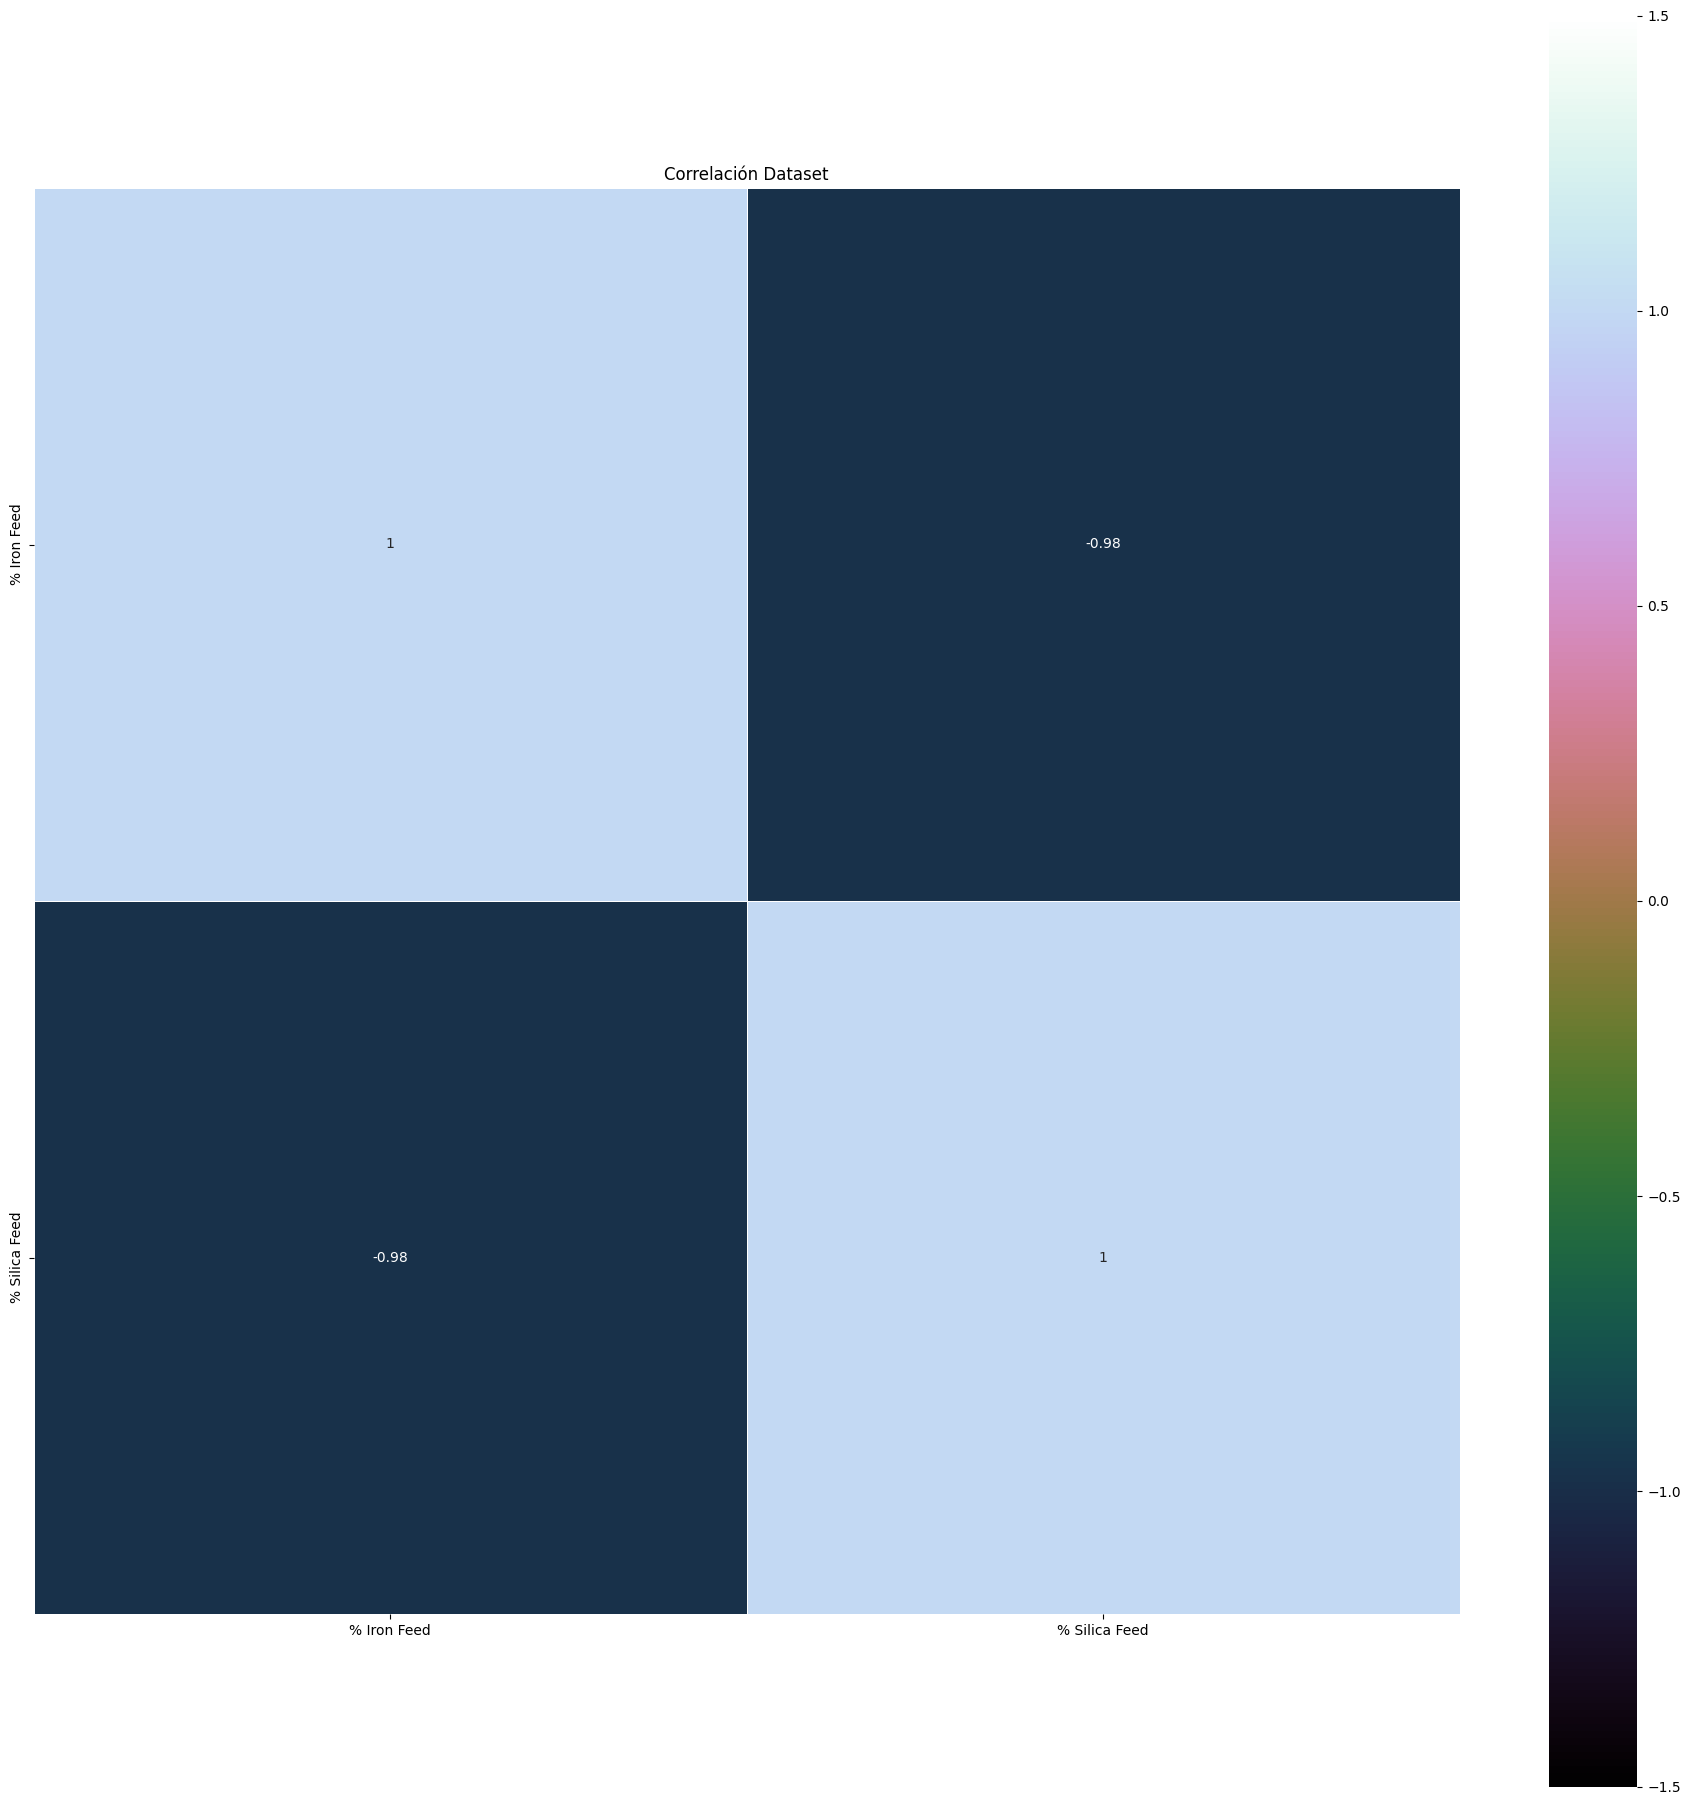

In [10]:
plt.figure(figsize=(23,23))
corrdata0=df_uno.corr(method = 'pearson')
sns.heatmap(corrdata0, cmap = 'cubehelix', linewidths=.5, annot=True, vmin = -1.5, vmax = 1.5,
            cbar_kws={"orientation": "vertical"}, square=True)
plt.title("Correlación Dataset")
plt.show()